In [2]:
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 8.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
df = yf.download('^GSPC',start='1996-01-01',end='2022-01-01')
'''
-- Market: 
S&P500
-- Define trend: 
S&P500 above the 200-day Moving Average
-- Entry:
10-period RSI below 30 (buy on the next day's open)
-- Exit:
10-period RSI above 40, or after 10 trading days(sell on next day's open)

'''

[*********************100%***********************]  1 of 1 completed


In [20]:
df['MA200'] = df['Adj Close'].rolling(window=200).mean()
df = df.dropna()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
1997-08-01,954.289978,955.349976,939.039978,947.140015,947.140015,513750000,799.737001,-0.007513,0.000000,0.007513,0.004495,0.002452,1.833020,64.701981,No
1997-08-04,947.140015,953.179993,943.599976,950.299988,950.299988,456000000,800.953551,0.003336,0.003336,0.000000,0.004379,0.002207,1.984182,66.489982,No
1997-08-05,950.299988,954.210022,948.919983,952.369995,952.369995,525710000,802.161301,0.002178,0.002178,0.000000,0.004159,0.001986,2.093841,67.677715,No
1997-08-06,952.369995,962.429993,949.450012,960.320007,960.320007,565200000,803.413651,0.008348,0.008348,0.000000,0.004578,0.001788,2.560769,71.916182,No
1997-08-07,960.320007,964.169983,950.869995,951.190002,951.190002,576030000,804.636751,-0.009507,0.000000,0.009507,0.004120,0.002560,1.609654,61.680737,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,3641050000,4391.307046,-0.000630,0.000000,0.000630,0.004248,0.002560,1.659557,62.399747,No
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,3733540000,4395.257346,-0.019393,0.000000,0.019393,0.003823,0.004243,0.901061,47.397795,No
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,3371250000,4399.291896,-0.000964,0.000000,0.000964,0.003441,0.003915,0.878880,46.776803,No


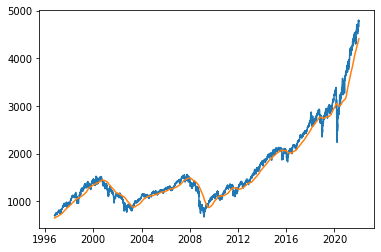

In [5]:
import matplotlib.pyplot as plt

plt.plot(df['Adj Close'])
plt.plot(df['MA200'])
plt.show()

In [22]:
import pandas as pd
df['price change'] = df['Adj Close'].pct_change()
df = df.dropna()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
1997-08-04,947.140015,953.179993,943.599976,950.299988,950.299988,456000000,800.953551,0.003336,0.003336,0.000000,0.004379,0.002207,1.984182,66.489982,No
1997-08-05,950.299988,954.210022,948.919983,952.369995,952.369995,525710000,802.161301,0.002178,0.002178,0.000000,0.004159,0.001986,2.093841,67.677715,No
1997-08-06,952.369995,962.429993,949.450012,960.320007,960.320007,565200000,803.413651,0.008348,0.008348,0.000000,0.004578,0.001788,2.560769,71.916182,No
1997-08-07,960.320007,964.169983,950.869995,951.190002,951.190002,576030000,804.636751,-0.009507,0.000000,0.009507,0.004120,0.002560,1.609654,61.680737,No
1997-08-08,951.190002,951.190002,925.739990,933.539978,933.539978,563420000,805.768101,-0.018556,0.000000,0.018556,0.003708,0.004159,0.891548,47.133249,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,3641050000,4391.307046,-0.000630,0.000000,0.000630,0.004248,0.002560,1.659557,62.399747,No
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,3733540000,4395.257346,-0.019393,0.000000,0.019393,0.003823,0.004243,0.901061,47.397795,No
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,3371250000,4399.291896,-0.000964,0.000000,0.000964,0.003441,0.003915,0.878880,46.776803,No


In [7]:
df['Upmove'] = df['price change'].apply(lambda x: x if x>0 else 0)
df
df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
df
df['avg Up'] = df['Upmove'].ewm(span=19).mean()
df['avg Down'] = df['Downmove'].ewm(span=19).mean()
df.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down
Date,,,,,,,,,,,,
1996-10-15,703.539978,708.070007,699.070007,702.570007,702.570007,458980000,654.546501,-0.001379,0.000000,0.001379,0.000000,0.001379
1996-10-16,702.570007,704.419983,699.150024,704.409973,704.409973,441410000,654.961950,0.002619,0.002619,0.000000,0.001378,0.000653
1996-10-17,705.000000,708.520020,704.760010,706.989990,706.989990,478550000,655.408400,0.003663,0.003663,0.000000,0.002221,0.000412
1996-10-18,706.989990,711.039978,706.109985,710.820007,710.820007,473020000,655.878950,0.005417,0.005417,0.000000,0.003151,0.000292
1996-10-21,710.820007,714.099976,707.710022,709.849976,709.849976,414630000,656.335900,-0.001365,0.000000,0.001365,0.002381,0.000554
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,3641050000,4391.307046,-0.000630,0.000000,0.000630,0.004248,0.002560
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,3733540000,4395.257346,-0.019393,0.000000,0.019393,0.003823,0.004243
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,3371250000,4399.291896,-0.000964,0.000000,0.000964,0.003441,0.003915


In [8]:
df['RS'] = df['avg Up']/df['avg Down']
df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x+1)))
df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30 ), 'Buy'] = 'Yes'
df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30 ), 'Buy'] = 'No'
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
1996-10-15,703.539978,708.070007,699.070007,702.570007,702.570007,458980000,654.546501,-0.001379,0.000000,0.001379,0.000000,0.001379,0.000000,0.000000,Yes
1996-10-16,702.570007,704.419983,699.150024,704.409973,704.409973,441410000,654.961950,0.002619,0.002619,0.000000,0.001378,0.000653,2.110609,67.851955,No
1996-10-17,705.000000,708.520020,704.760010,706.989990,706.989990,478550000,655.408400,0.003663,0.003663,0.000000,0.002221,0.000412,5.390370,84.351455,No
1996-10-18,706.989990,711.039978,706.109985,710.820007,710.820007,473020000,655.878950,0.005417,0.005417,0.000000,0.003151,0.000292,10.780387,91.511314,No
1996-10-21,710.820007,714.099976,707.710022,709.849976,709.849976,414630000,656.335900,-0.001365,0.000000,0.001365,0.002381,0.000554,4.297298,81.122453,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,3641050000,4391.307046,-0.000630,0.000000,0.000630,0.004248,0.002560,1.659557,62.399747,No
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,3733540000,4395.257346,-0.019393,0.000000,0.019393,0.003823,0.004243,0.901061,47.397795,No
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,3371250000,4399.291896,-0.000964,0.000000,0.000964,0.003441,0.003915,0.878880,46.776803,No


In [10]:
PnL = []

for i in range(len(df)):
  if 'Yes' in df['Buy'].iloc[i]:
    for j in range(1,11):
      if df['RSI'].iloc[i+j]>40:
        PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])
        break
      if df['RSI'].iloc[i+j]<40:
        PnL.append(df['Open'].iloc[i+12] - df['Open'].iloc[i+1])
        break
PnL

[2.42999267578125,
 4.239990234375,
 16.030029296875,
 -2.4000244140625,
 3.8900146484375,
 11.6600341796875,
 16.02001953125,
 35.30999755859375,
 44.8599853515625,
 25.9400634765625,
 10.169921875,
 15.2099609375,
 20.3599853515625,
 18.260009765625,
 59.929931640625,
 65.699951171875,
 100.3599853515625,
 34.2999267578125,
 1.280029296875,
 25.9300537109375,
 19.4300537109375,
 8.669921875,
 9.7899169921875,
 16.050048828125,
 17.9100341796875,
 3.419921875,
 -3.4200439453125,
 -5.9801025390625,
 14.2999267578125,
 -11.530029296875,
 -16.2100830078125,
 14.9300537109375,
 36.8599853515625,
 -6.06005859375,
 22.25,
 -42.260009765625,
 34.1199951171875,
 67.8699951171875,
 9.169921875,
 1.969970703125,
 3.4100341796875,
 8.89990234375,
 15.6500244140625,
 31.6600341796875,
 -25.27001953125,
 -20.9100341796875,
 -46.5299072265625,
 -27.2301025390625,
 -10.1199951171875,
 6.469970703125,
 14.8900146484375,
 37.1199951171875,
 13.7099609375,
 85.4200439453125,
 28.5599365234375,
 46.1099

##Positive successful trade:

In [13]:
len([i for i in PnL if i>0 ]) # Positive successful trade

59

In [23]:
len(PnL)

77

## Wining Rate:

In [15]:
len([i for i in PnL if i>0 ])/ len(PnL) # Wining rate

0.7662337662337663